<a href="https://colab.research.google.com/github/Southsidegbemijo/Network-Science/blob/main/Random%20Network%26Aggregated%20Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import math
!pip install python-louvain
from community import community_louvain
%matplotlib inline

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#%history -g

Network Growth Process
Nodes in a random network have a scale. In a random network have comparable degrees and the average degree 〈k〉 serves as the “scale” of a random network.The degree distribution,P(k), gives the probability that a selected
node has exactly k links.P(k) is obtained by counting the number of nodes N(k) with k = 1, 2… links and dividing by the total number of nodes N. The degree distribution allows us to distinguish
between different classes of networks. 

Analytical representation of degree distribution of random network
t = discrete time step from index 0
m = individual nodes added to the network, in one increment from index 0
m0= nodes present at network initialization
k = number of node links

In a random network P(k) = K/N, since P(k) is independent of time (and, subsequently, independent of the system size (m0 + t), we need to define a system that takes time into consideration.

Using a differwntial equation, rate that each edge is added to a vertex is 
∂ki/∂t = ki/2t :  ki(t) = m(t/ti)^0.5
where ti: time at which vertex i was added to the system

Assuming that we add the vertices at equal time intervals
to the system, we obtain that P(ti > m^2t/k2) = 1 − P(ti ≤ m^2t/k2) = 1 − m2t/k2(t + m0)
The probability density P(k) can be obtained from P(k) = ∂P(ki(t) < k)/∂k


Reference
Barabási, AL., Oltvai, Z. Network biology: understanding the cell's functional organization. Nat Rev Genet 5, 101–113 (2004). https://doi.org/10.1038/nrg1272
http://networksciencebook.com/chapter/4#scale-free

In [2]:
G = []
t = 0
k= 0
m= 0
m0=  0
G_values = [i+1 for i in range(100)]

def random_dist_deg(t, k, m, m0):
    return (t / (m*(m0 + t))) * np.exp(1-(k/m))
for i in G_values:
    prob = random_dist_deg
    G.append(prob)

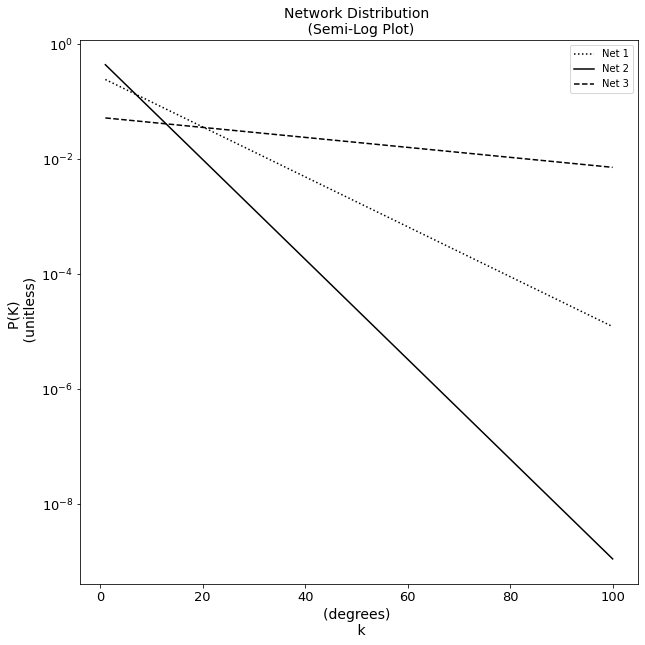

In [ ]:
network1 = [random_dist_deg(t=200000, k=i, m=10, m0=50) for i in G_values]
network2 = [random_dist_deg(t=100000, k=i, m=5, m0=50) for i in G_values]
network3 = [random_dist_deg(t=500000, k=i, m=50, m0=5000) for i in G_values]

plt.figure(figsize=(10, 10))
plt.semilogy(G_values, density_values_1, linestyle='dotted', color='black', label='Net 1')
plt.semilogy(G_values, density_values_2, linestyle='solid', color='black', label='Net 2')
plt.semilogy(G_values, density_values_3, linestyle='dashed', color='black', label='Net 3')
plt.xlabel('(degrees) \n k', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.ylabel('P(K) \n (unitless)', fontsize=14)
plt.title('Network Distribution \n (Semi-Log Plot)', fontsize=14)
plt.legend()
plt.savefig('figure1.png', bbox_inches='tight')
# plt.show()

Q2
Read the Supreme Court Citation Network data (Allcites.txt) as an undirected network, and do the following:
Select the largest connected component (LCC) of the network by ignoring other smaller connected components.
Use the Louvain method to detect communities in the LCC.
Create an aggregated network of the LCC in which each detected community is represented as a node, 
using NetworkX's "quotient_graph" command.Visualize the aggregated network. If possible, use "draw_networkx_nodes" and "draw_networkx_edges" and their options to make the visualization more informative, by, e.g., changing the node sizes 
according to the sizes of communities, changing edge weights according to connection weights between communities, etc.

In [5]:
g = nx.read_edgelist('/content/Allcites.txt')

In [6]:
g.number_of_nodes()

25417

Read the Supreme Court Citation Network data (Allcites.txt) as an undirected network, and do the following:
Select the largest connected component (LCC) of the network by ignoring other smaller connected components

In [9]:
largest_cc = max(nx.connected_components(g), key = len)

In [10]:
len(largest_cc)

25389

Use the Louvain method to detect communities in the LCC.

In [11]:
#lcc_g = nx.induced_subgraph(g2, largest_cc)
lcc_g = g.subgraph(largest_cc)

In [12]:
# compute the best partition
communities_lcc = community_louvain.best_partition(lcc_g)

In [13]:
best_communities_lcc = set(communities_lcc.values())

In [14]:
best_communities_lcc

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15}

Create an aggregated network of the LCC in which each detected community is represented as a node, 
using NetworkX's "quotient_graph" command.Visualize the aggregated network.

In [15]:
quotient_list = [[i for i in lcc_g.nodes if communities_lcc [i] == bcl] for bcl in best_communities_lcc]

In [16]:
get_quotient_graph = nx.quotient_graph(lcc_g, quotient_list)

In [17]:
get_quotient_graph.number_of_nodes()

16

In [18]:
get_quotient_graph = nx.quotient_graph(lcc_g, quotient_list)
quotient_cc_nodes =  list(get_quotient_graph.nodes)

In [19]:
quotient_graph_pp = [get_quotient_graph.nodes[node] for node in quotient_cc_nodes ]
quotient_graph_pp

[{'graph': <networkx.classes.graph.Graph at 0x7f736592cfd0>,
  'nnodes': 2763,
  'nedges': 12263,
  'density': 0.003213824556051663},
 {'graph': <networkx.classes.graph.Graph at 0x7f736592cc50>,
  'nnodes': 628,
  'nedges': 2238,
  'density': 0.011367445829396885},
 {'graph': <networkx.classes.graph.Graph at 0x7f736592c110>,
  'nnodes': 2667,
  'nedges': 11312,
  'density': 0.0031818978366638904},
 {'graph': <networkx.classes.graph.Graph at 0x7f736592c750>,
  'nnodes': 253,
  'nedges': 458,
  'density': 0.014367275236840454},
 {'graph': <networkx.classes.graph.Graph at 0x7f73659174d0>,
  'nnodes': 1060,
  'nedges': 4092,
  'density': 0.0072906087979047515},
 {'graph': <networkx.classes.graph.Graph at 0x7f7365917850>,
  'nnodes': 2397,
  'nedges': 26411,
  'density': 0.009197292386211758},
 {'graph': <networkx.classes.graph.Graph at 0x7f7365917690>,
  'nnodes': 707,
  'nedges': 2148,
  'density': 0.008606769215974612},
 {'graph': <networkx.classes.graph.Graph at 0x7f7365917490>,
  'nnod

In [20]:
network_frequency = [node['nnodes']/len(largest_cc)for node in quotient_graph_pp]

In [21]:
network_frequency

[0.108826657213754,
 0.024735121509315058,
 0.10504549214226634,
 0.009964945448816417,
 0.041750364331009496,
 0.09441096537870731,
 0.027846705266060104,
 0.03017054629957856,
 0.13131671196187325,
 0.06187719090944897,
 0.09401709401709402,
 0.07680491551459294,
 0.033085194375516956,
 0.09255976997912482,
 0.04466501240694789,
 0.022923313245893893]

In [ ]:
#frequency = np.array([len(largest_cc) for largest_cc in quotient_graph_pp])

In [22]:
dict_network_frequency =[{ 'node':i, 'node_density':values} for i, values in enumerate (network_frequency)]

In [23]:
dict_network_frequency

[{'node': 0, 'node_density': 0.108826657213754},
 {'node': 1, 'node_density': 0.024735121509315058},
 {'node': 2, 'node_density': 0.10504549214226634},
 {'node': 3, 'node_density': 0.009964945448816417},
 {'node': 4, 'node_density': 0.041750364331009496},
 {'node': 5, 'node_density': 0.09441096537870731},
 {'node': 6, 'node_density': 0.027846705266060104},
 {'node': 7, 'node_density': 0.03017054629957856},
 {'node': 8, 'node_density': 0.13131671196187325},
 {'node': 9, 'node_density': 0.06187719090944897},
 {'node': 10, 'node_density': 0.09401709401709402},
 {'node': 11, 'node_density': 0.07680491551459294},
 {'node': 12, 'node_density': 0.033085194375516956},
 {'node': 13, 'node_density': 0.09255976997912482},
 {'node': 14, 'node_density': 0.04466501240694789},
 {'node': 15, 'node_density': 0.022923313245893893}]

In [24]:
a_nodes = [i for i in range(0, len(quotient_cc_nodes))]
b_nodes =  [i for i in range(0, len(quotient_cc_nodes))]

In [25]:
edge_list = []
for i in range(len(a_nodes)):
    for j in range (len(b_nodes)):
        if i != j:
            edge_list.append((a_nodes[i], b_nodes[j]))

In [26]:
edge_list

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (1, 0),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (2, 0),
 (2, 1),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (3, 10),
 (3, 11),
 (3, 12),
 (3, 13),
 (3, 14),
 (3, 15),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (4, 10),
 (4, 11),
 (4, 12),
 (4, 13),
 (4, 14),
 (4, 15),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (5, 10),
 (5, 11),
 (5, 12),
 (5, 13),
 (5, 14),
 (5, 15),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 7),
 (6, 8),
 (6, 9),
 (6, 10),
 (6, 11),
 (6, 12),
 (6, 13),
 (6, 14),
 (6, 15),
 (7, 0),
 (7,

In [27]:
type(edge_list[0][0])

int

In [28]:
aggregated_network = []
for i in  edge_list:
    results = dict()
    results['to_node'] = i[0]
    results['from_node'] = i[1]
    results['weight'] = get_quotient_graph.edges[quotient_cc_nodes [1], quotient_cc_nodes[2]]['weight']
    aggregated_network.append(results)
sum_of_edges = sum([i['weight'] for i in aggregated_network])
for i in aggregated_network:
  i['weight_density']= i['weight']/sum_of_edges       
                                                

In [ ]:
#aggregated_network

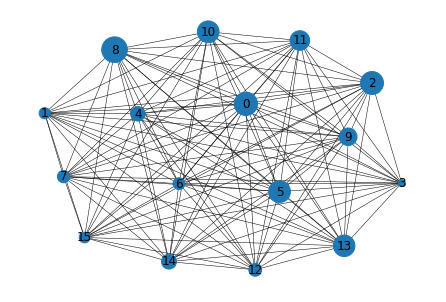

In [29]:
G = nx.Graph()
G.add_edges_from(edge_list)

nx.draw(G, 
        node_size = [i['node_density']*5000 for i in dict_network_frequency],
        with_labels=True,width = [i['weight_density']*120 for i in aggregated_network])
